# 1. Getting the dataset

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:

# Download latest version
path = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")

print("Path to dataset files:", path)



Path to dataset files: /home/codespace/.cache/kagglehub/datasets/fedesoriano/company-bankruptcy-prediction/versions/2


In [ ]:
# save into a dataframe 

df = pd.read_csv(path + '/data.csv')


In [12]:
# save into a csv file
df.to_csv('/workspaces/ESMT_IML/data/company_bankruptcy_prediction.csv', index=False)

# 2. Data Cleaning

In [51]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')


print(f'The dataset has {df.isna().sum().sum()} null values.')


print(f'The dataset has {df.duplicated().sum()} duplicate rows.')

cat_cols = [col for col in df.columns if df[col].dtypes == 'O']


print(f'There are {len(cat_cols)} categorical columns in the dataset.')


binary_cols = []

for col in df.columns:
    if df[col].nunique() == 2:
        binary_cols.append(col)

print(f'There are {len(binary_cols)} binary columns.')   
print(f'They are: {binary_cols}.')   

The dataset has 6819 rows and 96 columns.
The dataset has 0 null values.
The dataset has 0 duplicate rows.
There are 0 categorical columns in the dataset.
There are 2 binary columns.
They are: ['Bankrupt?', ' Liability-Assets Flag'].


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [53]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [48]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# 3. Feature selection

In [ ]:
# Defining X and y
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

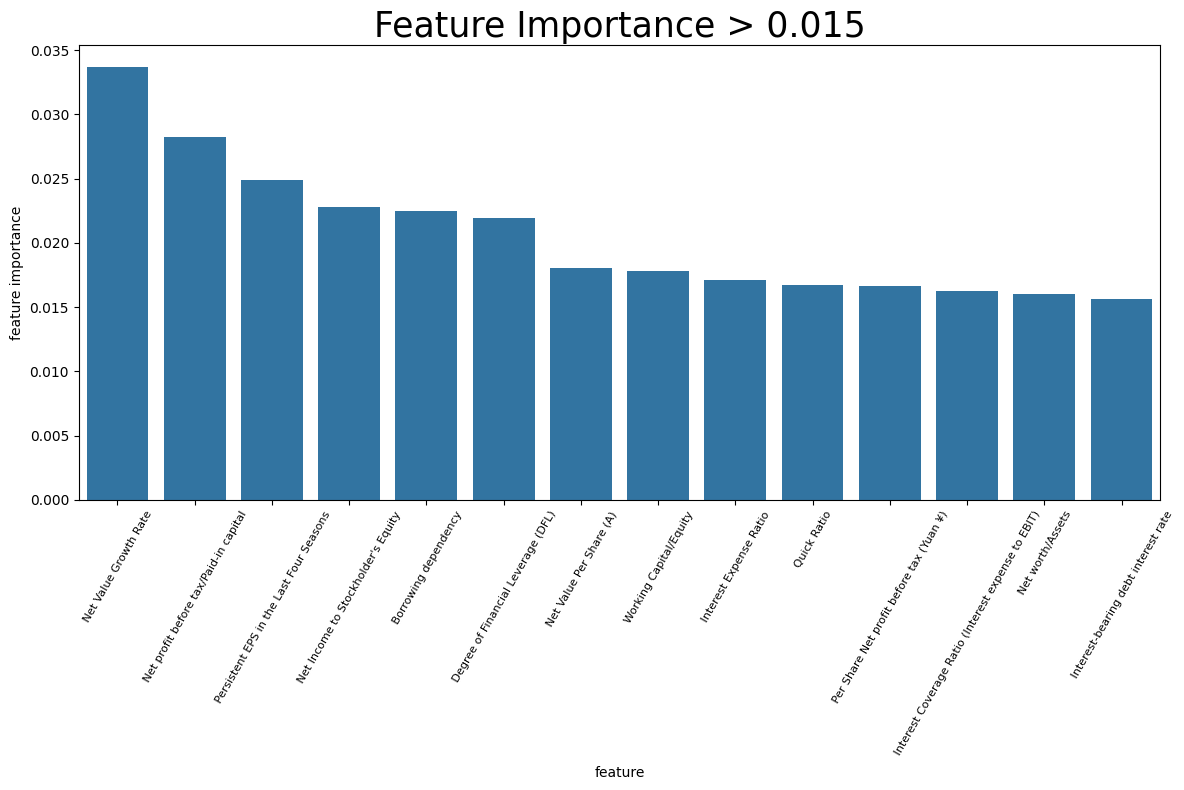

In [62]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

# To sort the index in descending order, I multiply 'rf.feature_importances_' by -1
sorted_idx = (-rf.feature_importances_).argsort()

list_of_tuples = list(zip(X.columns[sorted_idx],
                          rf.feature_importances_[sorted_idx]))

feat_importance = pd.DataFrame(list_of_tuples,
                  columns=['feature', 'feature importance'])

##################

fig = plt.figure(figsize=(12,8))

fig = sns.barplot(data=feat_importance[feat_importance['feature importance'] > 0.015], x='feature', y='feature importance')
plt.title('Feature Importance > 0.015',fontsize=25)
plt.xticks(fontsize=8,rotation=60)

plt.tight_layout()

In [82]:

col_015 = feat_importance[feat_importance['feature importance'] > 0.015]['feature'].to_list()

print('Features with importance > 0.015: ')
print(col_015)
print()

X[col_015].head()

Features with importance > 0.015: 
[' Net Value Growth Rate', ' Net profit before tax/Paid-in capital', ' Persistent EPS in the Last Four Seasons', " Net Income to Stockholder's Equity", ' Borrowing dependency', ' Degree of Financial Leverage (DFL)', ' Net Value Per Share (A)', ' Working Capital/Equity', ' Interest Expense Ratio', ' Quick Ratio', ' Per Share Net profit before tax (Yuan ¥)', ' Interest Coverage Ratio (Interest expense to EBIT)', ' Net worth/Assets', ' Interest-bearing debt interest rate']



,Net Value Growth Rate,Net profit before tax/Paid-in capital,Persistent EPS in the Last Four Seasons,Net Income to Stockholder's Equity,Borrowing dependency,Degree of Financial Leverage (DFL),Net Value Per Share (A),Working Capital/Equity,Interest Expense Ratio,Quick Ratio,Per Share Net profit before tax (Yuan ¥),Interest Coverage Ratio (Interest expense to EBIT),Net worth/Assets,Interest-bearing debt interest rate
0,0.000327,0.137757,0.169141,0.827890,0.390284,0.026601,0.147950,0.721275,0.629951,0.001208,0.138736,0.564050,0.792424,0.000725
1,0.000443,0.168962,0.208944,0.839969,0.376760,0.264577,0.182251,0.731975,0.635172,0.004039,0.169918,0.570175,0.828824,0.000647
2,0.000396,0.148036,0.180581,0.836774,0.379093,0.026555,0.177911,0.742729,0.629631,0.005348,0.142803,0.563706,0.792484,0.000790
3,0.000382,0.147561,0.193722,0.834697,0.379743,0.026697,0.154187,0.729825,0.630228,0.002896,0.148603,0.564663,0.848535,0.000449
4,0.000439,0.167461,0.212537,0.839973,0.375025,0.024752,0.167502,0.732000,0.636055,0.003727,0.168412,0.575617,0.893491,0.000686


In [69]:
perm_importance = permutation_importance(rf, X, y)

sorted_idx = (-perm_importance.importances_mean).argsort()

list_of_tuples  = list(zip(X.columns[sorted_idx],
                           perm_importance.importances_mean[sorted_idx]))

perm_importance = pd.DataFrame(list_of_tuples,
                  columns=['feature','permutation importance'])

In [ ]:
print(perm_importance.head(15))

                                              feature  permutation importance
0                  Degree of Financial Leverage (DFL)                0.001789
1                                Borrowing dependency                0.001173
2                              Interest Expense Ratio                0.000616
3         Non-industry income and expenditure/revenue                0.000587
4                               Net Value Growth Rate                0.000557
5                           Inventory/Working Capital                0.000557
6                                   Cash/Total Assets                0.000557
7                             Average Collection Days                0.000499
8                              Cash/Current Liability                0.000499
9                                         Quick Ratio                0.000440
10                            Net Value Per Share (A)                0.000352
11                             Working Capital/Equity           

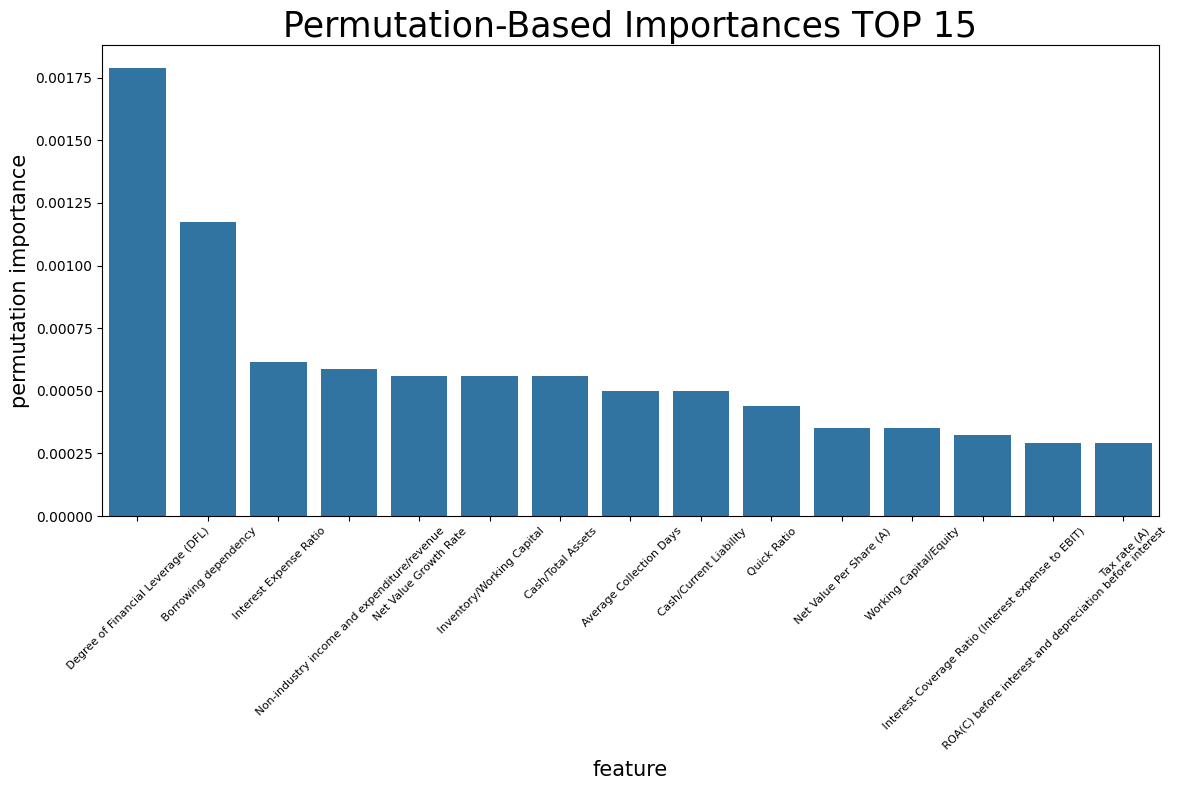

In [81]:
plt.figure(figsize=(12,8))

sns.barplot(perm_importance.loc[0:14,], x='feature', y='permutation importance')

plt.title('Permutation-Based Importances TOP 15', fontsize=25)
plt.xlabel('feature', fontsize=15)
plt.xticks(fontsize=8, rotation=45)
plt.ylabel('permutation importance', fontsize=15)
    
plt.tight_layout()

In [79]:
col_15 = perm_importance.loc[0:14, ]['feature'].to_list()

print('TOP 15 Feature based on permutation importance: ')
col_15

TOP 15 Feature based on permutation importance: 


[' Degree of Financial Leverage (DFL)',
 ' Borrowing dependency',
 ' Interest Expense Ratio',
 ' Non-industry income and expenditure/revenue',
 ' Net Value Growth Rate',
 ' Inventory/Working Capital',
 ' Cash/Total Assets',
 ' Average Collection Days',
 ' Cash/Current Liability',
 ' Quick Ratio',
 ' Net Value Per Share (A)',
 ' Working Capital/Equity',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' ROA(C) before interest and depreciation before interest',
 ' Tax rate (A)']

# 4. Classification

In [46]:
def get_test_scores(model_name:str,preds,y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy  = accuracy_score(y_test_data,preds)
    precision = precision_score(y_test_data,preds,average='macro')
    recall    = recall_score(y_test_data,preds,average='macro')
    f1        = f1_score(y_test_data,preds,average='macro')

    table = pd.DataFrame({'model': [model_name],'precision': [precision],'recall': [recall],
                          'F1': [f1],'accuracy': [accuracy]})

    return table 

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X[col_015], y, test_size=0.3, random_state=42)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf_test_preds_FI = rf.predict(X_test)

rf_test_results_FI = get_test_scores('Random Forest (with Feature Importance)', rf_test_preds_FI, y_test)

rf_test_results_FI 

,model,precision,recall,F1,accuracy
0,Random Forest (with Feature Importance),0.852634,0.588473,0.635694,0.966276
